# Download Metadata : only need to run this the first time when downloading

In [ ]:
import requests

csv_url = "https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/metadata.csv"
req = requests.get(csv_url)

url_content = req.content

csv_file = open('downloaded.csv', 'wb')

csv_file.write(url_content)

csv_file.close()

# Create dataframe from downloaded metadata

In [1]:
import pandas as pd

df = pd.read_csv("downloaded.csv")

df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [16]:
#df = df[df.finding != 'todo']
#df = df[df.finding != 'Unknown']
#df = df[df.finding != 'No Finding']
df['finding'].value_counts()

Pneumonia/Viral/COVID-19                   307
Pneumonia                                   39
todo                                        25
No Finding                                  17
Pneumonia/Fungal/Pneumocystis               17
Tuberculosis                                10
Pneumonia/Bacterial/Streptococcus            9
Pneumonia/Viral/SARS                         8
Pneumonia/Lipoid                             6
Pneumonia/Bacterial/Legionella               6
Pneumonia/Bacterial/Klebsiella               5
Pneumonia/Viral/MERS-CoV                     4
Pneumonia/Viral/Influenza                    3
Pneumonia/Bacterial/Mycoplasma               3
Pneumonia/Viral/Varicella                    2
Pneumonia/Fungal/Aspergillosis               2
Pneumonia/Bacterial                          1
Pneumonia/Bacterial/Nocardia                 1
Pneumonia/Aspiration                         1
Pneumonia/Viral/Herpes                       1
Pneumonia/Viral/Influenza/H1N1               1
Pneumonia/Bac

In [17]:
df = df[df.finding != 'todo']
df = df[df.finding != 'Unknown']
df = df[df.finding != 'No Finding']

In [18]:
df['finding'].unique()

array(['Pneumonia/Viral/COVID-19', 'Pneumonia', 'Pneumonia/Viral/SARS',
       'Pneumonia/Fungal/Pneumocystis',
       'Pneumonia/Bacterial/Streptococcus',
       'Pneumonia/Bacterial/Chlamydophila', 'Pneumonia/Bacterial/E.Coli',
       'Pneumonia/Bacterial/Klebsiella', 'Pneumonia/Bacterial/Legionella',
       'Pneumonia/Lipoid', 'Pneumonia/Viral/Varicella',
       'Pneumonia/Bacterial', 'Pneumonia/Bacterial/Mycoplasma',
       'Pneumonia/Viral/Influenza', 'Tuberculosis',
       'Pneumonia/Viral/Influenza/H1N1', 'Pneumonia/Fungal/Aspergillosis',
       'Pneumonia/Viral/Herpes ', 'Pneumonia/Aspiration',
       'Pneumonia/Bacterial/Nocardia', 'Pneumonia/Viral/MERS-CoV',
       'Pneumonia/Bacterial/Staphylococcus/MRSA'], dtype=object)

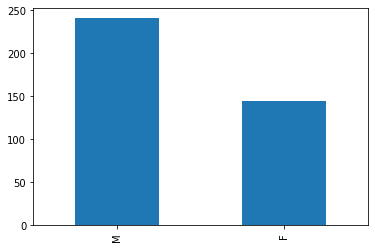

In [20]:
df['sex'].value_counts().plot(kind='bar')

# Get rid of duplicate patient entries

In [2]:
df = df.drop_duplicates(subset='patientid', keep="first")

# Plot number of patients (Males & Female split) for each finding 

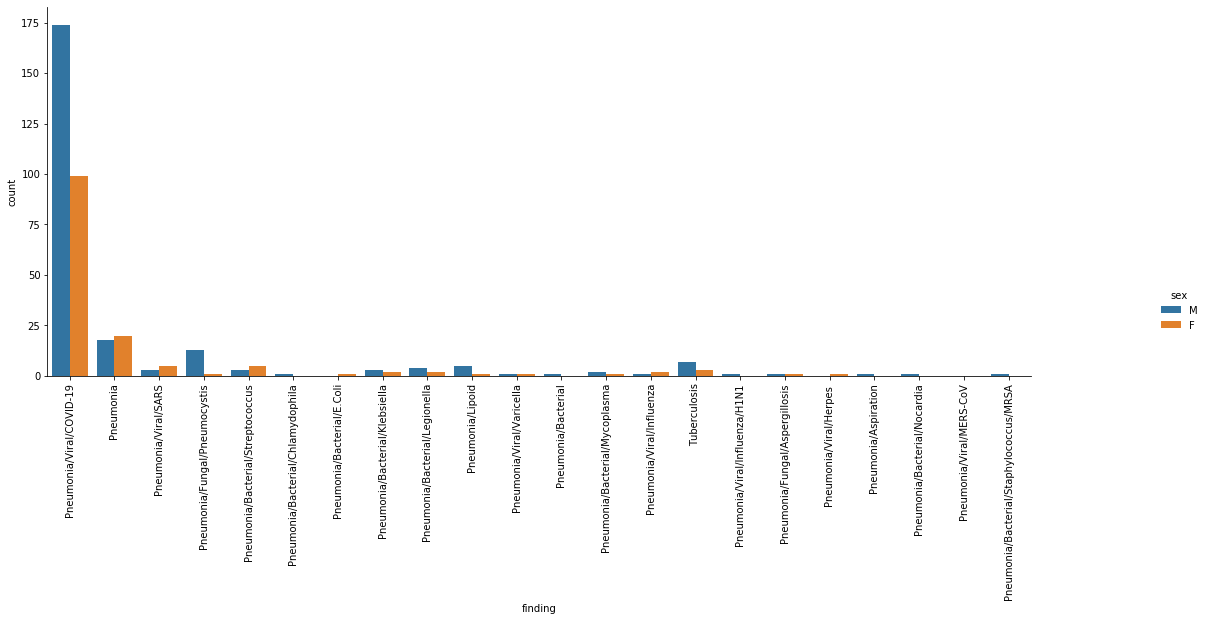

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

chart=sns.catplot(x="finding",kind='count',hue='sex',data=df)
plt.gcf().set_size_inches(20, 6)
chart.set_xticklabels(rotation=90)

# Plot number of patients (Survived or not split) for each finding

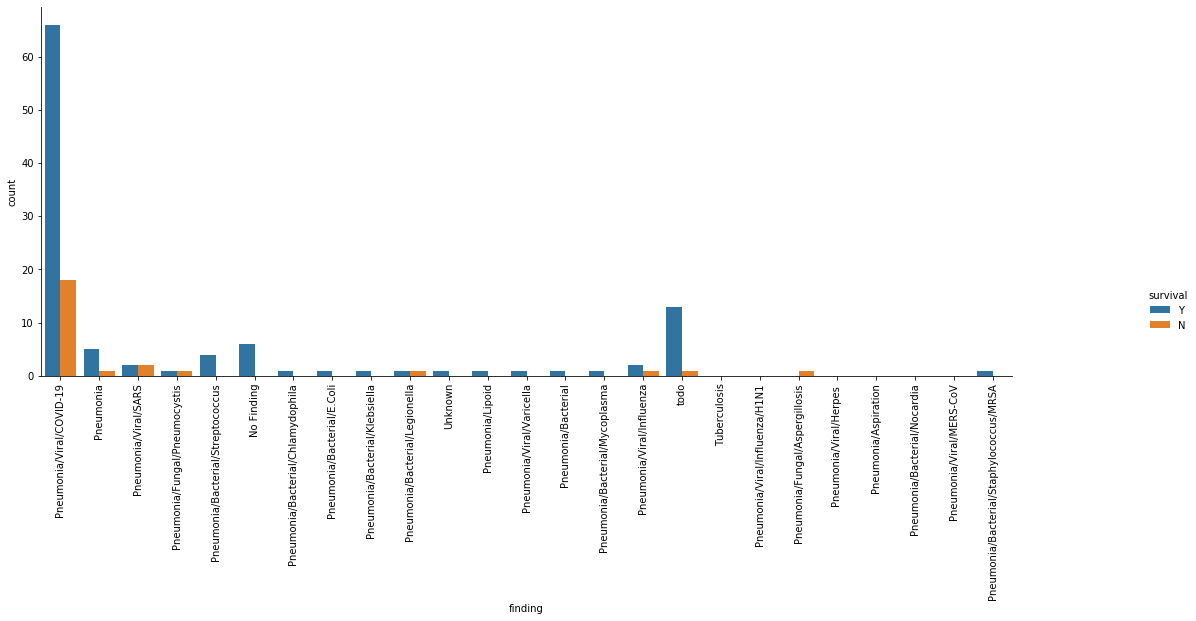

In [13]:
chart=sns.catplot(x="finding",kind='count',hue='survival', data=df)
plt.gcf().set_size_inches(20, 6)
chart.set_xticklabels(rotation=90)

# Create seperate dataframe for just Covid patients

In [3]:
covid = df.loc[df['finding'] == 'Pneumonia/Viral/COVID-19']

In [4]:
covid.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
7,6,0.0,NaN,NaN,Pneumonia/Viral/COVID-19,Y,NaN,Y,Y,Y,...,"January 6, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2a.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN
20,11,0.0,M,56.0,Pneumonia/Viral/COVID-19,Y,Y,NaN,NaN,NaN,...,2020,"Sunnybrook Health Sciences Centre, Toronto, On...",images,1-s2.0-S0140673620303706-fx1_lrg.jpg,10.1016/S0140-6736(20)30370-6,https://www.sciencedirect.com/science/article/...,NaN,A 56-year-old man presented to our Emergency D...,NaN,NaN
21,12,7.0,M,42.0,Pneumonia/Viral/COVID-19,Y,Y,NaN,NaN,NaN,...,"January 1, 2020","Tongji Medical College, Wuhan, Hubei Province,...",images,nCoV-radiol.2020200269.fig1-day7.jpeg,10.1148/radiol.2020200269,https://pubs.rsna.org/doi/10.1148/radiol.20202...,NaN,"On January 1, 2020, a 42-year-old man was admi...",NaN,NaN


# Group the age groups to make it easier to plot

In [5]:
for index, row in covid.iterrows():
    if row['age'] <= 10:
        covid['age'][index] = '0-10'
    elif row['age'] <= 20:
        covid['age'][index] = '10-20'
    elif row['age'] <= 30:
        covid['age'][index] = '20-30'
    elif row['age'] <= 40:
        covid['age'][index] = '30-40'
    elif row['age'] <= 50:
        covid['age'][index] = '40-50'
    elif row['age'] <= 60:
        covid['age'][index] = '50-60'
    elif row['age'] <= 70:
        covid['age'][index] = '60-70'
    elif row['age'] <= 100:
        covid['age'][index] = '70-100'


/Users/meghana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/meghana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/meghana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = 

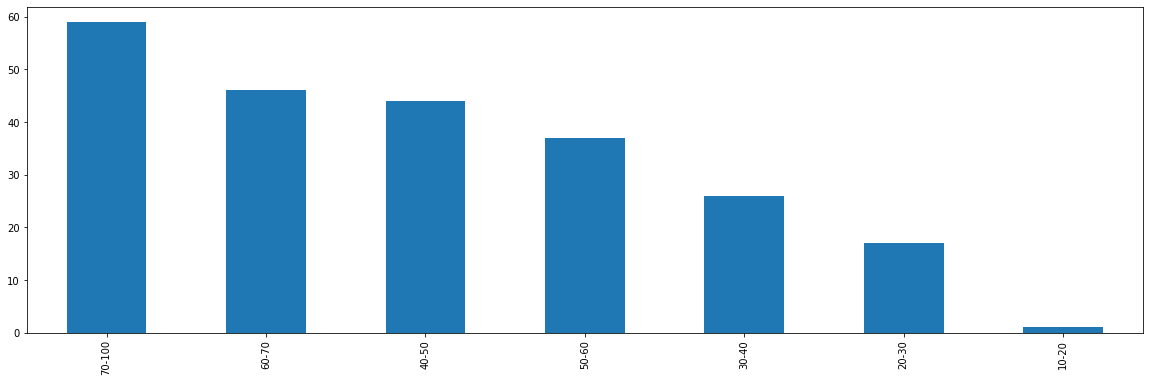

In [22]:
covid.age.value_counts().plot(kind='bar', figsize = (20,6))

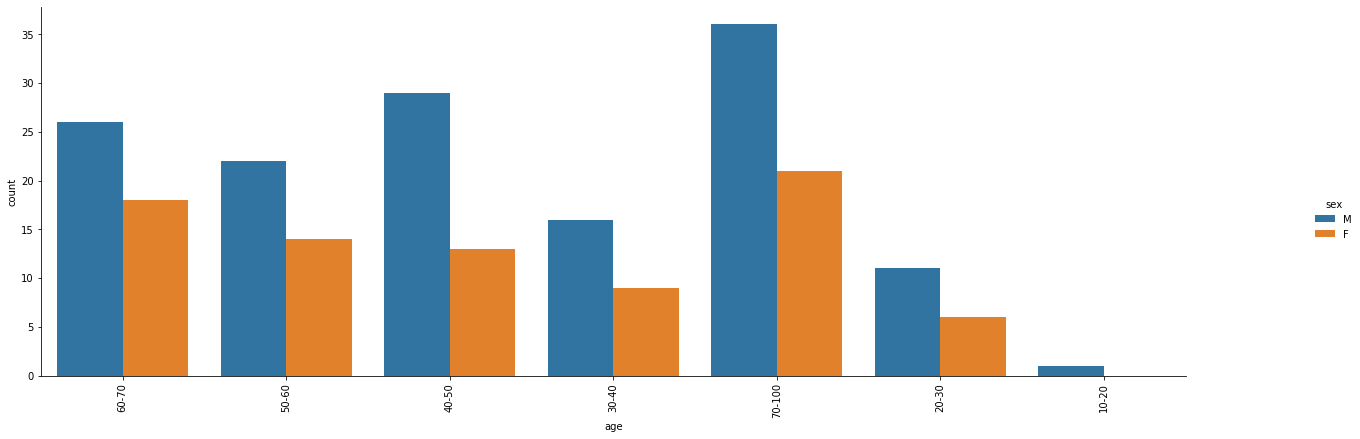

In [23]:
chart=sns.catplot(x="age",kind='count',hue='sex', data=covid)
plt.gcf().set_size_inches(20, 6)
chart.set_xticklabels(rotation=90)

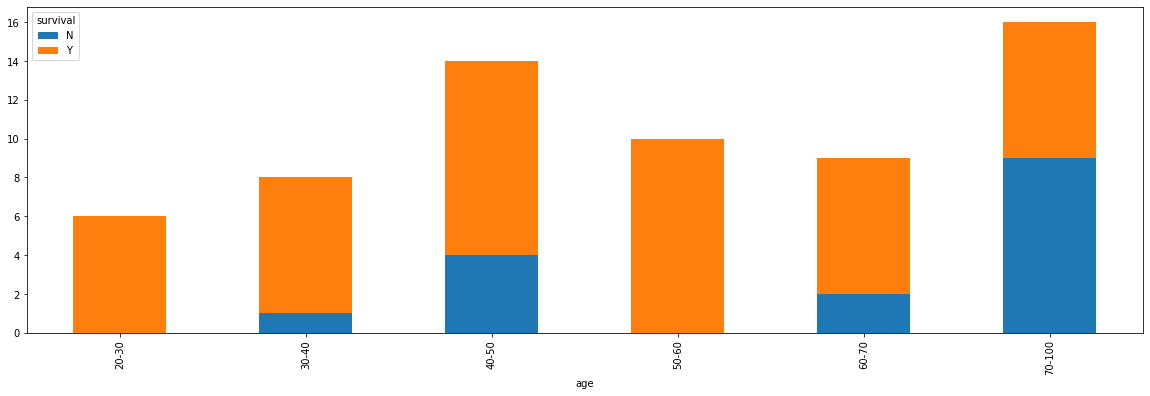

In [7]:
covid.groupby(['age', 'survival']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,6))


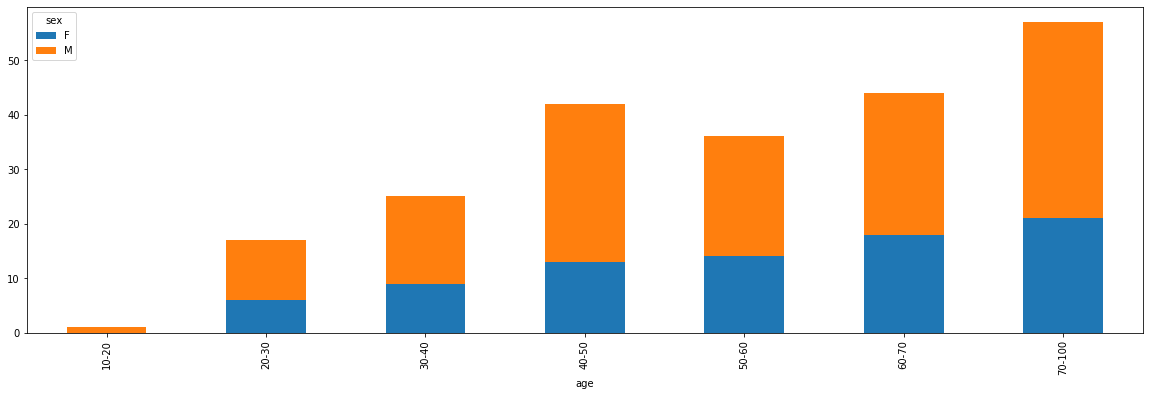

In [8]:
covid.groupby(['age', 'sex']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,6))


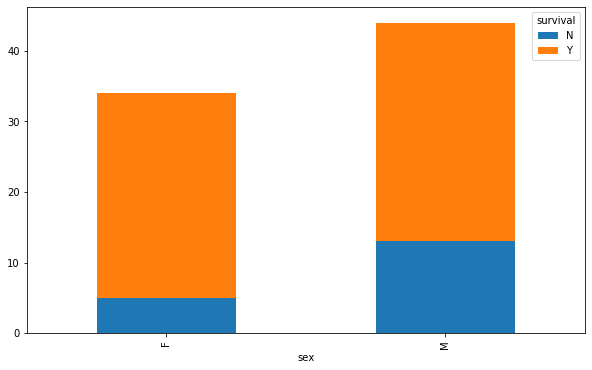

In [10]:
covid.groupby(['sex', 'survival']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))


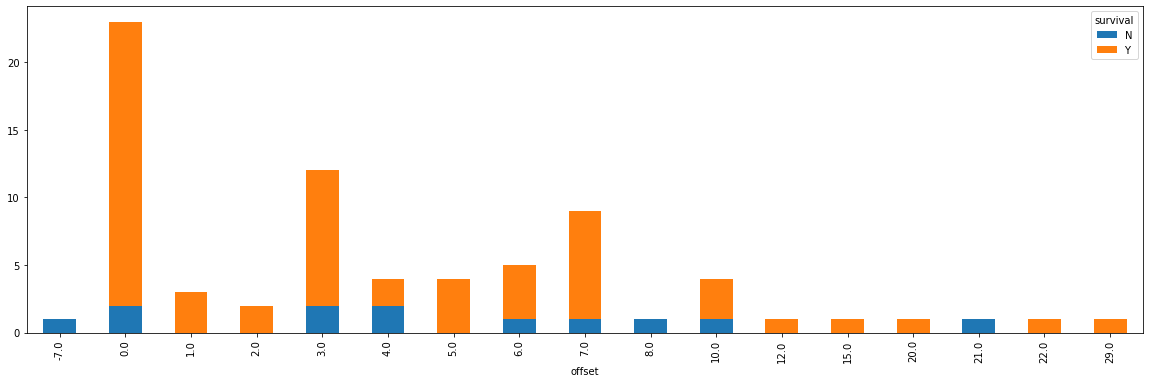

In [11]:
covid.groupby(['offset', 'survival']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,6))
